<a href="https://colab.research.google.com/github/dasmiq/cs6200-hw3/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification

In class, we spent some time on text classification, including naive Bayes classifiers.  We focused on these models not only because they are simple to implement and fairly effective, but also because of their similarity to widely used bag-of-words retrieval models such as BM25 and query likelihood.

Your task is to write a naive Bayes text categorization system to predict whether movie reviews are positive or negative.  The data for this **sentiment analysis** task were first assembled and published in Bo Pang and Lillian Lee, &ldquo;A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts&rdquo;, _Proceedings of the Association for Computational Linguistics_, 2004.

## Loading the data

First we load the training, development, and test splits of this dataset.

In [1]:
import json
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read one JSON record per line
def read_jsonl(f):
  res = []
  for line in f:
    res.append(json.loads(line))
  return res

If you're working offline, you could modify this code to read from the copies of the data in the repository.

In [3]:
train = read_jsonl(urlopen("https://github.com/dasmiq/cs6200-hw3/blob/main/train.json?raw=true"))
dev = read_jsonl(urlopen("https://github.com/dasmiq/cs6200-hw3/blob/main/dev.json?raw=true"))
test = read_jsonl(urlopen("https://github.com/dasmiq/cs6200-hw3/blob/main/test.json?raw=true"))

Each of these subsets of the data is a list of documents, and each document has a unique identifier (`id`) and text (`text`). The training and development documents, in addition, have been labeled with a `class`.

In [4]:
print(train[0])
print(dev[0])
print(test[0])


{'id': '12178', 'class': 'neg', 'text': "the sequel to the fugitive ( 1993 ) , u . s marshals is an average thriller using it's association with the fugitive just so it can make a few extra bucks . \ntommy lee jones returns to his role as chief deputy samuel gerard , the grizzly cop who was after harrison ford in the fugitive . \nthis time , he's after fugitive mark sheridan ( snipes ) who the police think killed two fbi agents , but of course he's been set up , and when the police plane escort he ( and gerard ) are riding crashes , he makes a run for it , gerard not so hot on his tail . \nwhat follows is about 2 hours of action , brought to us by the director of executive decision ( 1995 ) , another film curiously involving a plane . \nwhen comparing this movie to the fugitive , the prequel is far superior . \nbut even on it's own , u . s marshals is a pretty lousy movie . \nwhile the original was reasonably intelligent , and had a fugitive to root for , the audience feels strangely d

## Collecting term statistics

The text has been pre-tokenized and lower-cased.  All you have to do to get the individual terms in a review is to split the tokens by whitespace, a sequence of spaces and/or newlines.

In [5]:
## TODO: Write a function to convert a document into a collection of terms and their counts.
## Convert the lists of documents in the training, development, and test sets into these collections of terms and counts.
###### TASK 1 
# Write a function which takes 1 document and generate the term statistics of that document 
from collections import Counter

def document_term_stat_generator(document_text):
    """
    Write code to generate term statistics
    """
    ans = document_text.replace("\n"," ")
    ans = ans.split()
    doc_dict = dict(Counter(ans).items())
    return doc_dict
    
# Iterate all the documents and run the above function, generate the collections of terms and count in train, dev and test
train_doc_term_dict = {}
for doc in train:
    term_dict1 = document_term_stat_generator(doc['text'])
    train_doc_term_dict[doc['id']] = term_dict1
    
dev_doc_term_dict = {}
for doc in dev:
    term_dict2 = document_term_stat_generator(doc['text'])
    dev_doc_term_dict[doc['id']] = term_dict2

test_doc_term_dict = {}
for doc in test:
    term_dict3 = document_term_stat_generator(doc['text'])
    test_doc_term_dict[doc['id']] = term_dict3


In [6]:
print("Train Data stats:")
list(train_doc_term_dict.values())[:10]

Train Data stats:


[{'the': 39,
  'sequel': 1,
  'to': 13,
  'fugitive': 12,
  '(': 7,
  '1993': 1,
  ')': 7,
  ',': 46,
  'u': 6,
  '.': 37,
  's': 6,
  'marshals': 6,
  'is': 17,
  'an': 3,
  'average': 4,
  'thriller': 2,
  'using': 2,
  "it's": 9,
  'association': 1,
  'with': 2,
  'just': 2,
  'so': 4,
  'it': 5,
  'can': 1,
  'make': 3,
  'a': 13,
  'few': 2,
  'extra': 1,
  'bucks': 1,
  'tommy': 2,
  'lee': 2,
  'jones': 2,
  'returns': 1,
  'his': 5,
  'role': 3,
  'as': 7,
  'chief': 1,
  'deputy': 1,
  'samuel': 1,
  'gerard': 4,
  'grizzly': 1,
  'cop': 1,
  'who': 2,
  'was': 3,
  'after': 2,
  'harrison': 3,
  'ford': 2,
  'in': 8,
  'this': 5,
  'time': 5,
  "he's": 2,
  'mark': 1,
  'sheridan': 1,
  'snipes': 6,
  'police': 2,
  'think': 1,
  'killed': 1,
  'two': 1,
  'fbi': 2,
  'agents': 1,
  'but': 10,
  'of': 7,
  'course': 2,
  'been': 2,
  'set': 1,
  'up': 1,
  'and': 13,
  'when': 3,
  'plane': 4,
  'escort': 1,
  'he': 3,
  'are': 4,
  'riding': 1,
  'crashes': 1,
  'makes': 1,


In [7]:
print("Dev Data stats:")
list(dev_doc_term_dict.values())[:10]

Dev Data stats:


[{'under': 1,
  'any': 3,
  'other': 2,
  'circumstances': 1,
  ',': 40,
  'i': 18,
  'would': 3,
  'not': 4,
  'be': 5,
  'discussing': 1,
  'the': 51,
  'ending': 6,
  'of': 30,
  'a': 28,
  'film': 7,
  'to': 20,
  'extent': 2,
  'that': 17,
  'will': 2,
  'in': 9,
  'this': 6,
  'particular': 1,
  'review': 1,
  '.': 25,
  'however': 3,
  'order': 1,
  'fully': 2,
  'explain': 1,
  'exactly': 1,
  'how': 1,
  'and': 14,
  'why': 1,
  'movie': 7,
  'is': 10,
  'so': 3,
  'awful': 1,
  'minute': 1,
  'dissection': 1,
  'necessary': 1,
  'even': 4,
  'though': 1,
  'reveal': 1,
  'details': 2,
  'last': 1,
  'scenes': 1,
  'do': 2,
  'proceed': 1,
  'at': 5,
  'your': 1,
  'own': 1,
  'risk': 1,
  'opens': 1,
  '(': 10,
  'quite': 2,
  'poorly': 1,
  'might': 1,
  'add': 1,
  ')': 10,
  'as': 8,
  'child': 2,
  'psychologist': 1,
  'malcolm': 3,
  'crowe': 1,
  'bruce': 1,
  'willis': 1,
  'looking': 1,
  'like': 1,
  'he': 1,
  'was': 7,
  'dragged': 1,
  'out': 2,
  'his': 3,
  'tra

In [8]:
print("Test Data stats:")
list(test_doc_term_dict.values())[:10]

Test Data stats:


[{'the': 46,
  'lives': 2,
  'of': 20,
  'older': 2,
  'people': 1,
  'in': 12,
  'twilight': 1,
  'their': 4,
  'years': 5,
  'attempting': 1,
  'to': 21,
  'come': 2,
  'grips': 1,
  'with': 7,
  'shared': 1,
  'histories': 1,
  'and': 24,
  'possible': 1,
  'futures': 1,
  'is': 19,
  'a': 24,
  'fascinating': 1,
  'topic': 1,
  '.': 40,
  'finding': 1,
  'an': 5,
  'all-star': 1,
  'cast': 1,
  'for': 8,
  'such': 2,
  'film': 6,
  'stroke': 1,
  'genius': 1,
  'combining': 1,
  'all': 2,
  'that': 11,
  'three-time': 1,
  'oscar-winning': 1,
  'director': 1,
  '(': 7,
  'robert': 1,
  'benton': 1,
  '"': 7,
  'kramer': 2,
  'vs': 1,
  ')': 7,
  'creating': 1,
  'decidedly': 1,
  'mediocre': 1,
  'movie': 4,
  'stuff': 1,
  'disappointment': 1,
  'yet': 1,
  'another': 2,
  'noir': 2,
  'mystery': 1,
  'set': 2,
  'hollywood': 1,
  '--': 2,
  'how': 3,
  'many': 1,
  'these': 2,
  'have': 6,
  'we': 2,
  'seen': 1,
  'during': 1,
  'past': 3,
  'few': 1,
  '?': 1,
  'atmosphere': 1

The statistics for individual documents will be useful in predicting the class of those documents, e.g., in the test set.

Now, you will collect the statistics used to estimate the parameters of a naive Bayes model.

In [9]:
## TODO: Write a function to take a list of document statistics and produce a dictionary of term counts in each class.
## Your output will look something like this:

# for i in train:
#     i['text'] = i.get('text').replace("\n"," ")
#     i['text'] = i.get('text').split()
    
#print(ans)
#print(train[:10]) 
from collections import Counter
import re
def class_term_stat(data):
    neg_list = []
    pos_list = []
    realData = dict()
    for i in data:
        #print(i['text'])
        if i['class']=='neg':
            for j in i['text']:
                neg_list.append(j)
        else:
             for j in i['text']:
                pos_list.append(j)

    neg_counts = dict(Counter(neg_list))
    pos_counts = dict(Counter(pos_list))
    #print(pos_list)
    #print(neg_list[:100])
    realData['pos'] = pos_counts
    realData['neg'] = neg_counts
    return realData
#print(neg_counts)

for i in train:
    i['text'] = [word for word in re.split("\W+", i['text'])]
#     i['text'] = i.get('text').replace("\n"," ")
#      i['text'] = i.get('text').split()
ans = class_term_stat(train)



fakeData = {'pos': {'the': 10000, 'and': 800},
            'neg': {'the': 1001, 'and': 799}}

In [10]:
print("Class counts:")
ans

Class counts:


{'pos': {'when': 1342,
  'i': 3311,
  'left': 173,
  'the': 33040,
  'theater': 97,
  'after': 752,
  'seeing': 153,
  'david': 186,
  'lynch': 26,
  's': 7765,
  'lost': 150,
  'highway': 12,
  'remarked': 3,
  'to': 13119,
  'a': 16195,
  'fellow': 47,
  'movie': 1989,
  'goer': 3,
  'feel': 233,
  'like': 1435,
  'someone': 145,
  'just': 1059,
  'sucked': 14,
  'my': 516,
  'brains': 11,
  'out': 1431,
  'through': 502,
  'nose': 10,
  'and': 15818,
  'put': 172,
  'them': 763,
  'back': 461,
  'in': 9282,
  'ears': 10,
  'his': 4502,
  'first': 813,
  'feature': 113,
  'film': 4172,
  'five': 101,
  'years': 395,
  'delivers': 75,
  'second': 165,
  'only': 903,
  'debut': 41,
  'picture': 269,
  'eraserhead': 3,
  'on': 2967,
  'weirdness': 7,
  'scale': 30,
  'you': 2124,
  'won': 154,
  't': 2253,
  'know': 457,
  'what': 1342,
  'happened': 69,
  'it': 6761,
  'over': 599,
  'though': 412,
  'there': 1367,
  'are': 2956,
  'certainly': 167,
  'enough': 347,
  'clues': 13,
  'w

## Estimating naive Bayes parameters

As we discussed in class, you could use simple maximum-likelihood estimation for naive Bayes parameters, i.e., computing the relative frequency of a term given a class. The problem is that the relative frequency of words not seen in the training data will be zero, e.g., $p(\texttt{aardvark} | \texttt{pos}) = \frac{0}{\textrm{tokens in the positive training data}}$.

To avoid this problem, estimate the parameters with **add-1 (Laplace) smoothing**. In other words, add an additional count of 1 to each word type. Then, to make the probability distribution sum to 1, add a count of 1 for each vocabulary word to the denominator. For our `aardvark` example, we would now have, for vocabulary $V$, $p(\texttt{aardvark} | \texttt{pos}) = \frac{0 + 1}{N_{\texttt{pos}} + 1 \cdot |V|}$


In [11]:
## TODO: Write a function to compute the add-1 smoothed parameters for a naive Bayes model given the term statistics you computed above.
## Collect these parameters for the training set.
#N-pos: number of tokens in positive corpus: add values of the keys in dictionary
# V - number of unique words in positive corpus : no. of keys in pos dict
# numerator -> for eg 'blank':16 , take value of each key in pos corpus +1
#do same for negative as well

def calculate_nb_parameters(reviews_type):
        #take pos corpus
        corpus =ans[reviews_type]
        total_tokens = sum(corpus.values())
        num_of_keys = len(corpus.keys()) #len(ans['neg'].keys())+len(ans['pos'].keys())#
        prob_parameters = dict()
        for words in wordlist:
            if words in corpus:
                value = corpus[words]
            else:
                value = 0
            probability = (value+1)/(total_tokens+num_of_keys)
            prob_parameters[words]=probability
       
                
        return prob_parameters
    
#unique_words = ans[].keys()   
wordlist = []
wordlist.extend(ans['neg'].keys())
wordlist.extend(ans['pos'].keys())
wordlist = list(set(wordlist))
#print(wordlist)
pos_weights = calculate_nb_parameters('pos')
neg_weights = calculate_nb_parameters('neg')
    
    

What terms are likely to be important for prediction?

In [12]:
## TODO: Print a list of the 25 terms with the highest log ratio of positive to negative weight.
import numpy as np

pos_negweightdict = dict()
for posword in pos_weights:
#     print("p",posword)
    for negword in neg_weights:
        if posword == negword:
        
            pos_negweightdict[posword] = np.log(pos_weights.get(posword)/neg_weights.get(negword))
import operator
sorted_pos_negweightdict = dict( sorted(pos_negweightdict.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_pos_negweightdict.keys())[:25]    
    

['shrek',
 'mulan',
 'flynt',
 'ordell',
 'gattaca',
 'argento',
 'guido',
 'leila',
 'homer',
 'sweetback',
 'mallory',
 'taran',
 'fei',
 'donkey',
 'sethe',
 'farquaad',
 'lebowski',
 'rounders',
 'lumumba',
 'giles',
 'lambeau',
 'coens',
 'carver',
 'cal',
 'dolores']

In [13]:
## TODO: Print a list of the 25 terms with the highest log ration of negative to positive weight.
import numpy as np
neg_posweightdict = dict()
for posword1 in pos_weights:
#     print("p",posword)
    for negword1 in neg_weights:
        if posword1 == negword1:
           # print(negword)
            neg_posweightdict[posword1] = np.log(neg_weights.get(negword1)/pos_weights.get(posword1))
            
import operator
sorted_neg_posweightdict = dict( sorted(neg_posweightdict.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_neg_posweightdict.keys())[:25]

['nbsp',
 'jolie',
 'brenner',
 'farrellys',
 'pokemon',
 'jill',
 'bilko',
 'cisco',
 'supergirl',
 'sphere',
 'babysitter',
 'psychlos',
 'silverman',
 'eszterhas',
 'bruckheimer',
 'mandingo',
 'psychlo',
 'atrocious',
 'memphis',
 'seagal',
 'raider',
 'silverstone',
 'hush',
 'macdonald',
 'tomb']

In [14]:
dev = read_jsonl(urlopen("https://github.com/dasmiq/cs6200-hw3/blob/main/dev.json?raw=true"))

Now, given the parameters you've estimated, you can make predictions about new documents.

In [15]:
## TODO: Compute the predictions of your model for each document in the development data.

negativecount =0
positivecount = 0
totalcount = 0

for i in train:
    if i['class']== 'neg':
        negativecount+=1
    else:
        positivecount+=1
    totalcount+=1

neg_prior_probability = negativecount/totalcount
pos_prior_probability = 1 - neg_prior_probability

result = dict()   
final_result= dict()
for i in dev:
    neg_posterior = 0
    pos_posterior = 0
#     ans = i.get('text').replace("\n"," ")
#     ans = ans.split()
    for word in i['text']:
        if word in neg_posweightdict.keys():
            neg_posterior += neg_prior_probability * neg_weights.get(word)#sorted_neg_posweightdict.get(word)
        if word in pos_negweightdict.keys():
            pos_posterior += pos_prior_probability * pos_weights.get(word)#sorted_pos_negweightdict.get(word)    
            
    result[i['id']]= (neg_posterior,pos_posterior, max(neg_posterior,pos_posterior))
    if max(neg_posterior,pos_posterior)== pos_posterior:
        final_result[i['id']] = 'pos'
    else: 
        final_result[i['id']] = 'neg'      
final_result          

devPredictions = list(final_result.values())
print(devPredictions)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

In [16]:
print(final_result)

{'20531': 'neg', '25886': 'neg', '6649': 'neg', '5778': 'neg', '17215': 'neg', '19210': 'neg', '5168': 'neg', '18090': 'neg', '27512': 'neg', '24782': 'neg', '13890': 'neg', '13660': 'neg', '9633': 'neg', '28796': 'neg', '17204': 'neg', '13710': 'neg', '24157': 'neg', '3087': 'neg', '5622': 'neg', '16325': 'neg', '12182': 'neg', '28381': 'neg', '17819': 'neg', '22134': 'neg', '22646': 'neg', '11703': 'neg', '10042': 'neg', '18185': 'neg', '26731': 'neg', '26335': 'neg', '16585': 'neg', '22807': 'neg', '21895': 'neg', '18033': 'neg', '29359': 'neg', '29629': 'neg', '9335': 'neg', '15924': 'neg', '7912': 'neg', '21128': 'neg', '15689': 'neg', '15886': 'neg', '13773': 'neg', '22140': 'neg', '11763': 'neg', '23466': 'neg', '19937': 'neg', '21725': 'neg', '17527': 'neg', '17055': 'neg', '25971': 'neg', '1576': 'neg', '15520': 'neg', '11961': 'neg', '13390': 'neg', '10698': 'neg', '18788': 'neg', '8584': 'neg', '10061': 'neg', '19051': 'neg', '17054': 'neg', '14767': 'neg', '19479': 'neg', '

In [17]:
## TODO: Write a function to compute the accuracy of predictions given correct classes.

devClasses = [x['class'] for x in dev]

def accuracy(predictions, devClasses):
    counter=0
    for i in range(len(devClasses)):
        if predictions[i]==devClasses[i]:
            counter+=1
    accuracy=counter/len(devClasses)
    return accuracy

original_model_accuracy = accuracy(devPredictions, devClasses)
print("Accuracy of predictions:", original_model_accuracy)

Accuracy of predictions: 0.5


In [18]:
## TODO: Compute the predictions of this model on each document in the test set.


final_result_test= dict()
result_test = dict()
for i in test:
    neg_posterior_test = 0
    pos_posterior_test = 0
#     ans = i.get('text').replace("\n"," ")
#     ans = ans.split()
    for word in i['text']:
        if word in neg_posweightdict.keys():
            neg_posterior_test += neg_prior_probability * neg_weights.get(word)#sorted_neg_posweightdict.get(word)
        if word in pos_negweightdict.keys():
            pos_posterior_test += pos_prior_probability * pos_weights.get(word)#sorted_pos_negweightdict.get(word)    
            
    result_test[i['id']]= (neg_posterior_test,pos_posterior_test, max(neg_posterior_test,pos_posterior_test))
    if max(neg_posterior_test,pos_posterior_test)== pos_posterior_test:
        final_result_test[i['id']] = 'pos'
    else: 
        final_result_test[i['id']] = 'neg'

final_result_test

{'11471': 'neg',
 '21565': 'neg',
 '15824': 'neg',
 '24353': 'neg',
 '9816': 'neg',
 '23776': 'neg',
 '11934': 'neg',
 '26154': 'neg',
 '11920': 'neg',
 '18509': 'neg',
 '25663': 'neg',
 '10800': 'neg',
 '20929': 'neg',
 '13475': 'neg',
 '21821': 'neg',
 '9803': 'neg',
 '28742': 'neg',
 '28965': 'neg',
 '11316': 'neg',
 '9342': 'neg',
 '5578': 'neg',
 '12806': 'neg',
 '2029': 'neg',
 '16679': 'neg',
 '9168': 'neg',
 '10220': 'neg',
 '5626': 'neg',
 '24218': 'neg',
 '17822': 'neg',
 '8841': 'neg',
 '29715': 'neg',
 '24219': 'neg',
 '9960': 'neg',
 '13106': 'neg',
 '12350': 'neg',
 '18645': 'neg',
 '5964': 'neg',
 '5794': 'neg',
 '20084': 'neg',
 '10185': 'neg',
 '24977': 'neg',
 '12547': 'neg',
 '9811': 'neg',
 '17563': 'neg',
 '7394': 'neg',
 '22928': 'neg',
 '18450': 'neg',
 '29114': 'neg',
 '10583': 'neg',
 '11851': 'neg',
 '9813': 'neg',
 '5152': 'neg',
 '9973': 'neg',
 '12747': 'neg',
 '6895': 'neg',
 '15954': 'neg',
 '7208': 'neg',
 '10718': 'neg',
 '17705': 'neg',
 '9478': 'neg',

## Comparing models with hypothesis testing (CS6200 only)

Now that you've built a straightforward naive Bayes model, you can try to improve it. You could try stemming words, or including bigrams or trigrams, or adjusting the hyperparameter for Laplace smoothing, or trying a different smoothing method. What you try is up to you.

In [19]:
train = read_jsonl(urlopen("https://github.com/dasmiq/cs6200-hw3/blob/main/train.json?raw=true"))

In [20]:
## TODO: Try different features and/or smoothing.
## Compute the predictions and the acuracy of your new model on development data.

from collections import Counter
from nltk.stem import PorterStemmer
def class_term_stat1(data):
    neg_list1 = []
    pos_list1 = []
    final_neg_list = []
    final_pos_list = []
    realData = dict()
    for i in data:
        #print(i['text'])
        if i['class']=='neg':
            for i in i['text']:
                neg_list1.append(i)
        else:
             for i in i['text']:
                pos_list1.append(i)
    
    ps = PorterStemmer()
    for w in neg_list1:
        word = ps.stem(w)
        final_neg_list.append(word)
        
    for w1 in pos_list1:
        word = ps.stem(w1)
        final_pos_list.append(word)

    neg_counts = dict(Counter(final_neg_list))
    pos_counts = dict(Counter(final_pos_list))
    realData['pos'] = pos_counts
    realData['neg'] = neg_counts
    return realData

# for i in train:
#     i['text'] = [word for word in re.split("\W+", i['text'])]

# for i in train:
#     i['text'] = i.get('text').replace("\n"," ")
#     i['text'] = i.get('text').split()
ans = class_term_stat1(train)
# print(ans)

def calculate_nb_parameters(reviews_type):
        #take pos corpus
        corpus =ans[reviews_type]
        total_tokens = sum(corpus.values())
        num_of_keys = len(corpus.keys()) #len(ans['neg'].keys())+len(ans['pos'].keys())#
        prob_parameters = dict()
        for words in wordlist:
            if words in corpus:
                value = corpus[words]
            else:
                value = 0
            probability = (value+1)/(total_tokens+num_of_keys)
            prob_parameters[words]=probability
       
                
        return prob_parameters
    
#unique_words = ans[].keys()   
wordlist = []
wordlist.extend(ans['neg'].keys())
wordlist.extend(ans['pos'].keys())
wordlist = list(set(wordlist))
#print(wordlist)
pos_weights1 = calculate_nb_parameters('pos')
neg_weights1 = calculate_nb_parameters('neg')



In [21]:
import numpy as np
neg_posweightdict1 = dict()
for posword1 in pos_weights1:
#     print("p",posword)
    for negword1 in neg_weights1:
        if posword1 == negword1:
           # print(negword)
            neg_posweightdict1[posword1] = np.log(neg_weights1.get(negword1)/pos_weights1.get(posword1))
#neg_posweightdict

In [22]:
pos_negweightdict1 = dict()
for posword in pos_weights1:
#     print("p",posword)
    for negword in neg_weights1:
        if posword == negword:
           # print(negword)
            pos_negweightdict1[posword] = np.log(pos_weights1.get(negword)/neg_weights1.get(posword))
#pos_negweightdict    
    

In [23]:

negativecount =0
positivecount = 0
totalcount = 0

for i in train:
    if i['class']== 'neg':
        negativecount+=1
    else:
        positivecount+=1
    totalcount+=1
        

neg_prior_probability = negativecount/totalcount
pos_prior_probability = 1 - neg_prior_probability
    
final_result= dict()
for i in dev:
    neg_posterior = 0
    pos_posterior = 0
#     ans = i.get('text').replace("\n"," ")
#     ans = ans.split()
    for word in i['text']:
        if word in neg_posweightdict1.keys():
            neg_posterior += neg_prior_probability * neg_weights1.get(word)#sorted_neg_posweightdict.get(word)
        if word in pos_negweightdict1.keys():
            pos_posterior += pos_prior_probability * pos_weights1.get(word)#sorted_pos_negweightdict.get(word)    
            
    result[i['id']]= (neg_posterior,pos_posterior, max(neg_posterior,pos_posterior))
    if max(neg_posterior,pos_posterior)== pos_posterior:
        final_result[i['id']] = 'pos'
    else: 
        final_result[i['id']] = 'neg'

result

{'20531': (164.45930218271164, 164.2401498120759, 164.45930218271164),
 '25886': (171.9217394954689, 171.81858994934728, 171.9217394954689),
 '6649': (187.60865430361582, 187.3900581495827, 187.60865430361582),
 '5778': (48.902192713911475, 48.84792771705596, 48.902192713911475),
 '17215': (210.69442191901135, 210.44086349500876, 210.69442191901135),
 '19210': (124.47533312036585, 124.30550211824416, 124.47533312036585),
 '5168': (95.26129104150097, 95.10542355906803, 95.26129104150097),
 '18090': (86.50393648921435, 86.3852084034941, 86.50393648921435),
 '27512': (154.89015150739266, 154.7363414988935, 154.89015150739266),
 '24782': (156.29150583169496, 156.1133556975462, 156.29150583169496),
 '13890': (167.69948450898815, 167.49567089445006, 167.69948450898815),
 '13660': (130.2202119984082, 130.0160832223178, 130.2202119984082),
 '9633': (159.2825557282483, 159.15442753986687, 159.2825557282483),
 '28796': (182.03692463742274, 181.8453061424066, 182.03692463742274),
 '17204': (148.0

In [24]:
dev2Predictions = list(final_result.values())

In [25]:
devClasses = [x['class'] for x in dev]
new_model_accuracy=0
def accuracy(predictions, devClasses):
    counter=0
    for i in range(len(devClasses)):
        if predictions[i]==devClasses[i]:
            counter+=1
    accuracy=counter/len(devClasses)
    return accuracy

new_model_accuracy = accuracy(dev2Predictions, devClasses)
print("New Model Accuracy",new_model_accuracy)

New Model Accuracy 0.51


Perhaps your new model will be better than your original naive Bayes model above; perhaps it will be worse. (That won't affect your grade.) Your next step is to implement a permutation test to compare the two models. Refer to the material on the bootstrap and permutation tests at the end of the evaluation lecture.

In [26]:
## TODO: Compute the difference in accuracy between your first naive Bayes model and your new one.

difference = abs(float(original_model_accuracy) - float(new_model_accuracy))
print("Difference between original and new model accuracy:", difference)

Difference between original and new model accuracy: 0.010000000000000009


In [27]:
## TODO: Write a function that, given two vectors of predictions that have
## the same length, swaps each pair of predictions with probability 0.5.

## Modify this dummy function that just echoes its inputs.
import random
n =len(devPredictions)
n2 = len(dev2Predictions)
def permute(y1, y2):
    i = random.randint(0,n-1)
    j= random.randint(0,n-1)
    TEMP_B = y2[j]
    y2[j] = y1[i]
    y1[i] = TEMP_B
    return (y1, y2)

r=permute(devPredictions,dev2Predictions)


In [28]:
## TODO: If you run this permute function 500 times on the predictions of your two models,
## it should produce 500 different pairs of vectors.
## Compute the difference in accuracy for each of these 500 pairs, i.e., a vector of 500 differences.
y1counter = 0
y2counter = 0
devClasses2 = [x['class'] for x in dev]
permutationDifferences = []
for i in range(500):
    perm_ansy1, perm_ansy2=permute(devPredictions,dev2Predictions)
    for j in range(len(perm_ansy1)):
        if perm_ansy1[j] == devClasses2[j]:
            y1counter+=1
        if perm_ansy2[j] == devClasses2[j]:
            y2counter+=1
    accuracy_y1 = y1counter/len(devClasses2)
    accuracy_y2 = y2counter/len(devClasses2)
    permutationDifferences.append(abs(accuracy_y1-accuracy_y2))

print(permutationDifferences)
    
            
        
        
    


[0.010000000000000009, 0.020000000000000018, 0.030000000000000027, 0.040000000000000036, 0.04999999999999982, 0.06000000000000005, 0.06999999999999984, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.0799999999999983, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.08000000000000007, 0.07000000000000028, 0.05999999999999872, 0.05000000000000071, 0.03999999999999915, 0.030000000000001137, 0.019999999999999574, 0.010000000000001563, 0.0, 0.00999999999999801, 0.019999999999999574, 0.030000000000001137, 0.03999999999999915, 0.05000000000000071, 0.05999999999999872, 0.07000000000000028, 0.0799999999999983, 0.08999999999999986, 

In [29]:
## TODO: Compute the proportion of these differences that are greater than the actual accuracy difference between your two models.
## This proportion is the p-value computed by this permutation test.
perm_count = 0
for i in permutationDifferences:
    if i > difference:
        perm_count+=1
proportion = perm_count/len(devClasses2)
print(proportion)
        

2.485


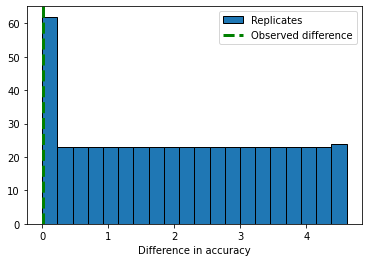

In [30]:
## This code should plot a histogram of the differences between the permuted vectors
## and the location of the observed accuracy difference.
plt.hist(permutationDifferences, 20, label='Replicates', edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [difference], ylim, '--g', linewidth=3, label='Observed difference')
plt.ylim(ylim)
plt.legend()
plt.xlabel('Difference in accuracy')
plt.show()